## Competition [Mercedes-Benz Greener Manufacturing](https://www.kaggle.com/competitions/mercedes-benz-greener-manufacturing)

<img src="https://images.unsplash.com/photo-1630596369706-57eaf9ba7cae?ixlib=rb-1.2.1&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=3570&q=80:*" width="600px">

<a class="anchor" id="0.1"></a>
# Table of Contents

1. [Import libraries](#1)
1. [Download data](#2)
1. [EDA](#3)

## 1. Import libraries<a class="anchor" id="1"></a>

[Back to Table of Contents](#0.1)

In [1]:
# Work with Data
import numpy as np 
import pandas as pd

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Modeling and Prediction
from sklearn.preprocessing import LabelEncoder

# Helpers
import os
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

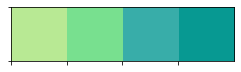

In [2]:
colors = ['#b8e994','#78e08f','#38ada9','#079992']
sns.palplot(sns.color_palette(colors))

## 2. Download data<a class="anchor" id="2"></a>

[Back to Table of Contents](#0.1)

In [3]:
train = pd.read_csv('../input/mercedes-benz-greener-manufacturing/train.csv.zip')
test = pd.read_csv('../input/mercedes-benz-greener-manufacturing/test.csv.zip')
sub = pd.read_csv('../input/mercedes-benz-greener-manufacturing/sample_submission.csv.zip')

print("Train shape : ", train.shape)
print("Test shape : ", test.shape)

Train shape :  (4209, 378)
Test shape :  (4209, 377)


In [4]:
train.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


## 3. EDA <a class="anchor" id="3"></a>
[Back to Table of Contents](#0.1)

### Task description

The objective of the competition is **to predict the time** required to complete the testing phase.<br>
The dataset represents various permutations of the characteristics of Mercedes-Benz vehicles.<br>
Reducing the running time of the algorithm could also help reduce carbon emissions without compromising Daimler's standards.<br>

The data set contains an anonymized set of variables (user functions) in a Mercedes vehicle.<br>
For example, a variable could be 4WD, it could be an added air suspension or a head-up display.

***y*** is the variable to be predicted, that is the time (in seconds) it took the car to pass the test for each variable

Variables containing letters - **categorical**.<br>
Variables with 0/1 - **binary**.

### 2.1 Target variable analysis

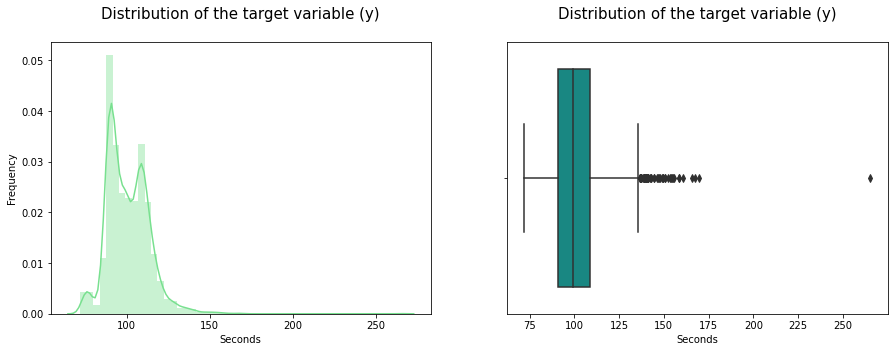

In [5]:
plt.figure(figsize=(15,5))
plt.subplot(121)
sns.distplot(train.y.values, bins=50, color=colors[1])
plt.title('Distribution of the target variable (y)\n',fontsize=15)
plt.xlabel('Seconds');
plt.ylabel('Frequency');

plt.subplot(122)
sns.boxplot(train.y.values, color=colors[3])
plt.title('Distribution of the target variable (y)\n',fontsize=15)
plt.xlabel('Seconds'); 

In [6]:
train.y.describe()

count    4209.000000
mean      100.669318
std        12.679381
min        72.110000
25%        90.820000
50%        99.150000
75%       109.010000
max       265.320000
Name: y, dtype: float64

The target variable (n) has a standard distribution of approximately 72 to 140 seconds.<br>
The first and third quartiles range from approximately 91 to 109 seconds, with a median of 100s.<br>
Also note that there are outliers starting at 140s that we can remove from the training sample as these values will add noise to our algorithm.

### 2.2 Data types

In [7]:
train.dtypes.value_counts()

int64      369
object       8
float64      1
dtype: int64

In [8]:
train.dtypes[train.dtypes=='float']

y    float64
dtype: object

In [9]:
train.dtypes[train.dtypes=='object']

X0    object
X1    object
X2    object
X3    object
X4    object
X5    object
X6    object
X8    object
dtype: object

In [10]:
obj = train.dtypes[train.dtypes=='object'].index
for i in obj:
    print(i, train[i].unique())

X0 ['k' 'az' 't' 'al' 'o' 'w' 'j' 'h' 's' 'n' 'ay' 'f' 'x' 'y' 'aj' 'ak' 'am'
 'z' 'q' 'at' 'ap' 'v' 'af' 'a' 'e' 'ai' 'd' 'aq' 'c' 'aa' 'ba' 'as' 'i'
 'r' 'b' 'ax' 'bc' 'u' 'ad' 'au' 'm' 'l' 'aw' 'ao' 'ac' 'g' 'ab']
X1 ['v' 't' 'w' 'b' 'r' 'l' 's' 'aa' 'c' 'a' 'e' 'h' 'z' 'j' 'o' 'u' 'p' 'n'
 'i' 'y' 'd' 'f' 'm' 'k' 'g' 'q' 'ab']
X2 ['at' 'av' 'n' 'e' 'as' 'aq' 'r' 'ai' 'ak' 'm' 'a' 'k' 'ae' 's' 'f' 'd'
 'ag' 'ay' 'ac' 'ap' 'g' 'i' 'aw' 'y' 'b' 'ao' 'al' 'h' 'x' 'au' 't' 'an'
 'z' 'ah' 'p' 'am' 'j' 'q' 'af' 'l' 'aa' 'c' 'o' 'ar']
X3 ['a' 'e' 'c' 'f' 'd' 'b' 'g']
X4 ['d' 'b' 'c' 'a']
X5 ['u' 'y' 'x' 'h' 'g' 'f' 'j' 'i' 'd' 'c' 'af' 'ag' 'ab' 'ac' 'ad' 'ae'
 'ah' 'l' 'k' 'n' 'm' 'p' 'q' 's' 'r' 'v' 'w' 'o' 'aa']
X6 ['j' 'l' 'd' 'h' 'i' 'a' 'g' 'c' 'k' 'e' 'f' 'b']
X8 ['o' 'x' 'e' 'n' 's' 'a' 'h' 'p' 'm' 'k' 'd' 'i' 'v' 'j' 'b' 'q' 'w' 'g'
 'y' 'l' 'f' 'u' 'r' 't' 'c']


### 2.3 Missing values

In [11]:
train.isna().sum()[train.isna().sum()>0]

Series([], dtype: int64)

### 2.4 Categorical variables

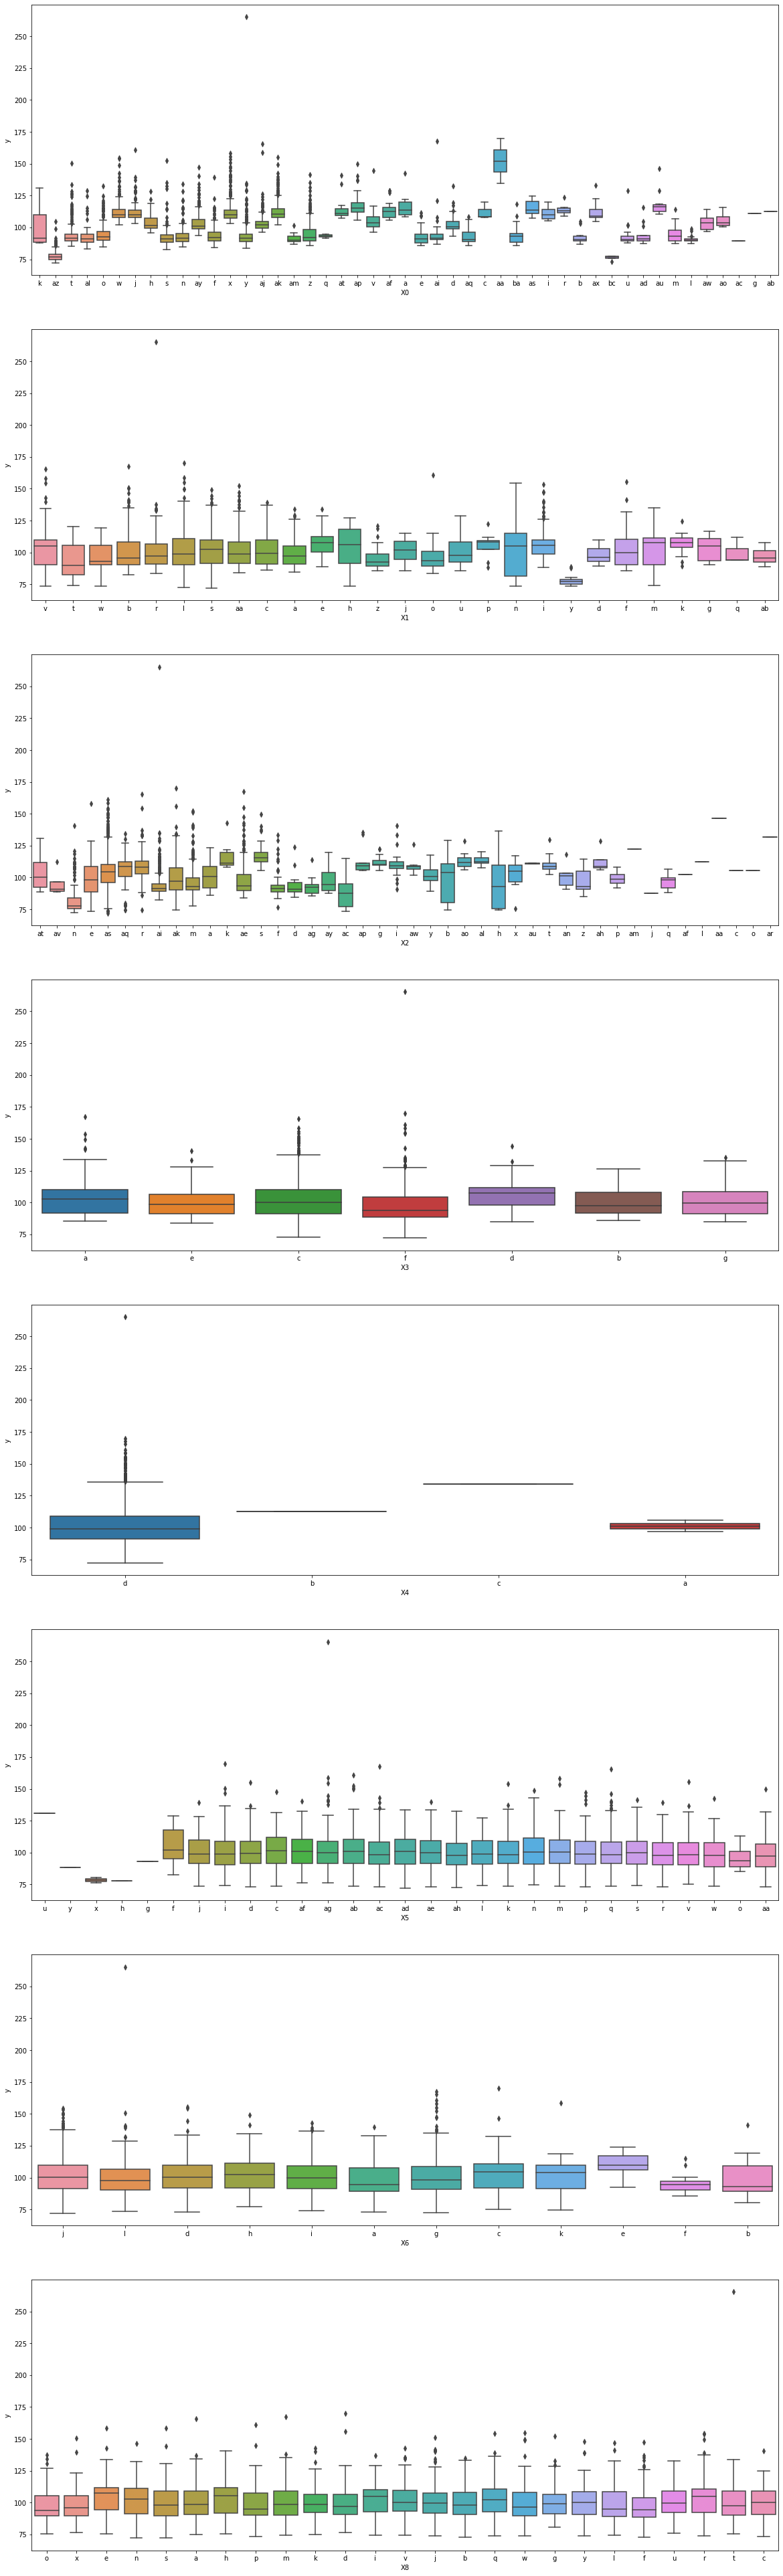

In [12]:
fig,ax = plt.subplots(len(obj), figsize=(20,70))

for i, col in enumerate(obj):
    sns.boxplot(x=col, y='y', data=train, ax=ax[i])

#### What we see from the charts:

1) Since there is a need to reduce the testing time, the best values in the variables for which this time is minimal are "az" and "bc" (X0), "y" (X1), "n" (X2), "x" and "h" (X5) -> **hypothesis** - can affect y?;

2) Variables X3, X5, X6, X8 have similar distributions of values, where there are no special differences within the feature between the values in the context of means and quartiles;

3) X0 and X2 have the greatest variety within the variables, which can potentially indicate the greater usefulness of these features.

### 2.5 Numeric variables

In [13]:
num = train.dtypes[train.dtypes=='int'].index[1:]

We have a set of numerical variables, where the value is set to 1 or 0, so there is no need to carry out a volume analysis.<br>
In this case, we should be interested in whether the value of the indicators inside the variables changes,<br>
for this we study the variance of these variables, using the var() function, and select only those where the variance is zero (that is, always 0, or 1 on the entire dataset in cut variable)

In [14]:
nan_num = []
for i in num:
    if (train[i].var()==0):
        print(i, train[i].var())
        nan_num.append(i)

X11 0.0
X93 0.0
X107 0.0
X233 0.0
X235 0.0
X268 0.0
X289 0.0
X290 0.0
X293 0.0
X297 0.0
X330 0.0
X347 0.0


We received several such variables, we can remove them from the analysis, since they will not affect the target in any way, thereby we increase the performance of the algorithm.

In [15]:
train = train.drop(columns=nan_num, axis=1)

### 2.6 Correlation analysis

In order for us to be able to do a correlation analysis for categorical variables, before that we need to convert these variables using LabelEncoder().<br>
When converting values to a binary form, we will not be able to track the relationship of a particular variable + we must take into account the test set, since its values will participate in finding the target.

In [16]:
for i in obj:
    le = LabelEncoder()
    le.fit(list(train[i].values) + list(train[i].values))
    train[i] = le.transform(list(train[i].values))

In [17]:
train[obj].head()

,X0,X1,X2,X3,X4,X5,X6,X8
0,32,23,17,0,3,24,9,14
1,32,21,19,4,3,28,11,14
2,20,24,34,2,3,27,9,23
3,20,21,34,5,3,27,11,4
4,20,23,34,5,3,12,3,13


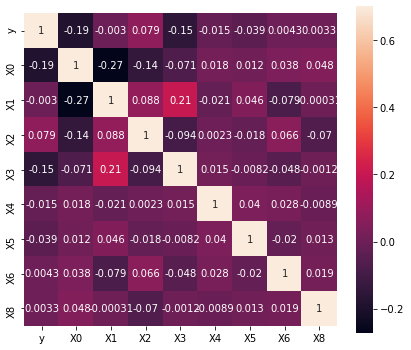

In [18]:
corr = train[train.columns[1:10]].corr()

fig,ax = plt.subplots(figsize=(7,6))
sns.heatmap(corr, vmax=.7, square=True,annot=True);

Among the categorical variables, we did not find a direct relationship with the target y.

In [19]:
threshold = 1

corr_all = train.drop(columns=obj, axis=1).corr()
corr_all.loc[:,:] =  np.tril(corr_all, k=-1) 

In [20]:
already_in = set()
result = []
for col in corr_all:
    perfect_corr = corr_all[col][corr_all[col] == threshold ].index.tolist()
    if perfect_corr and col not in already_in:
        already_in.update(set(perfect_corr))
        perfect_corr.append(col)
        result.append(perfect_corr)

In [21]:
result

[['X382', 'X17'],
 ['X232', 'X279', 'X29'],
 ['X35', 'X37', 'X31'],
 ['X39', 'X33'],
 ['X302', 'X44'],
 ['X113', 'X134', 'X147', 'X222', 'X48'],
 ['X102', 'X214', 'X239', 'X53'],
 ['X76', 'X54'],
 ['X324', 'X58'],
 ['X248', 'X253', 'X385', 'X60'],
 ['X172', 'X216', 'X62'],
 ['X213', 'X67'],
 ['X84', 'X244', 'X71'],
 ['X122', 'X243', 'X320', 'X88'],
 ['X245', 'X89'],
 ['X94', 'X242', 'X90'],
 ['X199', 'X112'],
 ['X119', 'X118'],
 ['X227', 'X125'],
 ['X146', 'X138'],
 ['X226', 'X326', 'X152'],
 ['X360', 'X155'],
 ['X262', 'X266', 'X184'],
 ['X247', 'X202'],
 ['X254', 'X230'],
 ['X364', 'X365', 'X240'],
 ['X296', 'X295'],
 ['X299', 'X298']]

When analyzing numerical variables, we found that some of them have a direct correlation with others, therefore, in order to avoid multicollinearity.<br>
So we can remove variables with a correlation of 1 (leave one of the group), or use regularization so that the algorithm does this automatically.<br>

How else can we remove such variables without correlation? It's simple, **we remove duplicates in the context of columns**.

In [22]:
train.T.drop_duplicates().T

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X373,X374,X375,X376,X377,X378,X379,X380,X383,X384
0,0.0,130.81,32.0,23.0,17.0,0.0,3.0,24.0,9.0,14.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,6.0,88.53,32.0,21.0,19.0,4.0,3.0,28.0,11.0,14.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,7.0,76.26,20.0,24.0,34.0,2.0,3.0,27.0,9.0,23.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,9.0,80.62,20.0,21.0,34.0,5.0,3.0,27.0,11.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,13.0,78.02,20.0,23.0,34.0,5.0,3.0,12.0,3.0,13.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,8405.0,107.39,8.0,20.0,16.0,2.0,3.0,0.0,3.0,16.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4205,8406.0,108.77,31.0,16.0,40.0,3.0,3.0,0.0,7.0,7.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4206,8412.0,109.22,8.0,23.0,38.0,0.0,3.0,0.0,6.0,4.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4207,8415.0,87.48,9.0,19.0,25.0,5.0,3.0,0.0,11.0,20.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
